# Introduction

## Overview
- This notebook focuses on making and analyzing learning trajectories
- It uses the MICS6 dataset
- The code is mostly built around foundational numeracy, but the same structure applies for literacy

## Notebook structure
- There are 5 sections:
    1. Introduction
    2. Descriptive Learning Trajectories
    3. Access vs. Learning Simulations
    4. Equity
    5. Extensions


- Each section has subsections in the following order: 
    - Conceptual overview (what is the section about)
    - Setup code
    - Blocks of annotated code
    - Graph (the main output)
    - Interpretation of the graph (tying it back to the overall learning trajectory messages)
    - Related literature (usually a graph and link)

## From raw to cleaned data
This is not covered in this notebook.  To get from the raw survey data downloaded from UNICEF's website to the clean datasets used in this notebook simply: 
- Download the country datasets from the MICS6 website.  They are only available as .sav files (SPSS).  The "fs.sav" dataset contains the data from the foundational skills survey module.  Alternatively, I have converted and stored each "fs.sav" file as a dta file in the shared Dropbox folder.
- Run the "cleaning" do file (after inputting the correct file pathways in the globals at the beginning)

## Cleaned data used in this notebook

### Cleaned datasets per country (clean_fs_*countryname*)
We we focus on the following variables: 
- numbskill: binary measure of learning, in this case of foundational numeracy
- target_percent: continuous measure of learning that measures the percentage of words read correctly in the literacy test's 72-word story  
- years_educ: highest grade attended
- schage: age at beginning of current school year
- fsweights: probability weights
- FL28: Interview completed
- FL10: Took literacy test
- HL4: gender
- windex5: wealth quintile
- HH6: urban vs. rural  
- noschool: dummy for having ever attended school 
- inschool: dummy for attending school at the time of the survey
- OOS: dummy for out of school at the time of the survey (inverse of inschool)

### Cleaned dataset of means
This is a dataset of means per grade per country, disaggregated by different subgroups. It is created by the "cleaning" do file from the country-level datasets.  We focus on:
- num_all_*: average numeracy
- num_f_*: average numeracy for girls
- num_m_*: average numeracy for boys
    
## Coding idiosyncrasies 

A great feature of Jupyter Notebook is that when you run a block of code, it displays the output below.  This is great for graphs.  But it can also return long, tiresome intermediate outputs (i.e. especially when running loops).  In many of the cells I have therefore added: 
- qui {}
The "quietly" command runs the code in Stata, but suppresses the output.  If you want to see the output, just delete this. 

## Globals

In [1]:
*Change the global file directories below to where the data is stored on your computer
clear all
set more off
*File directory for raw data
gl raw "/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learning Trajectories/PAL/Learning Trajectories Workshop/Data/Raw"
*File directory for cleaned data
gl cleaned "/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learning Trajectories/PAL/Learning Trajectories Workshop/Data/Cleaned"
*File directory to store dataset of means
gl means "/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learning Trajectories/PAL/Learning Trajectories Workshop/Data/Means"
*File directory to store graphs we create
gl graph "/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs"
*File directory to store tables we create
gl table "/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/Tables"

# Making and Visualizing Descriptive Learning Trajectories

## Setup

In [2]:
*Use the prepared dataset of country means
use "$means/years_educ", clear

*Create a cross-country learning trajectory that averages all 26 countries
egen num_all_avg=rmean(num_all_*)
lab var num_all_avg "Average of 26 Countries"



(1 missing value generated)



## Graph of Descriptive LTs - Numeracy by Grade

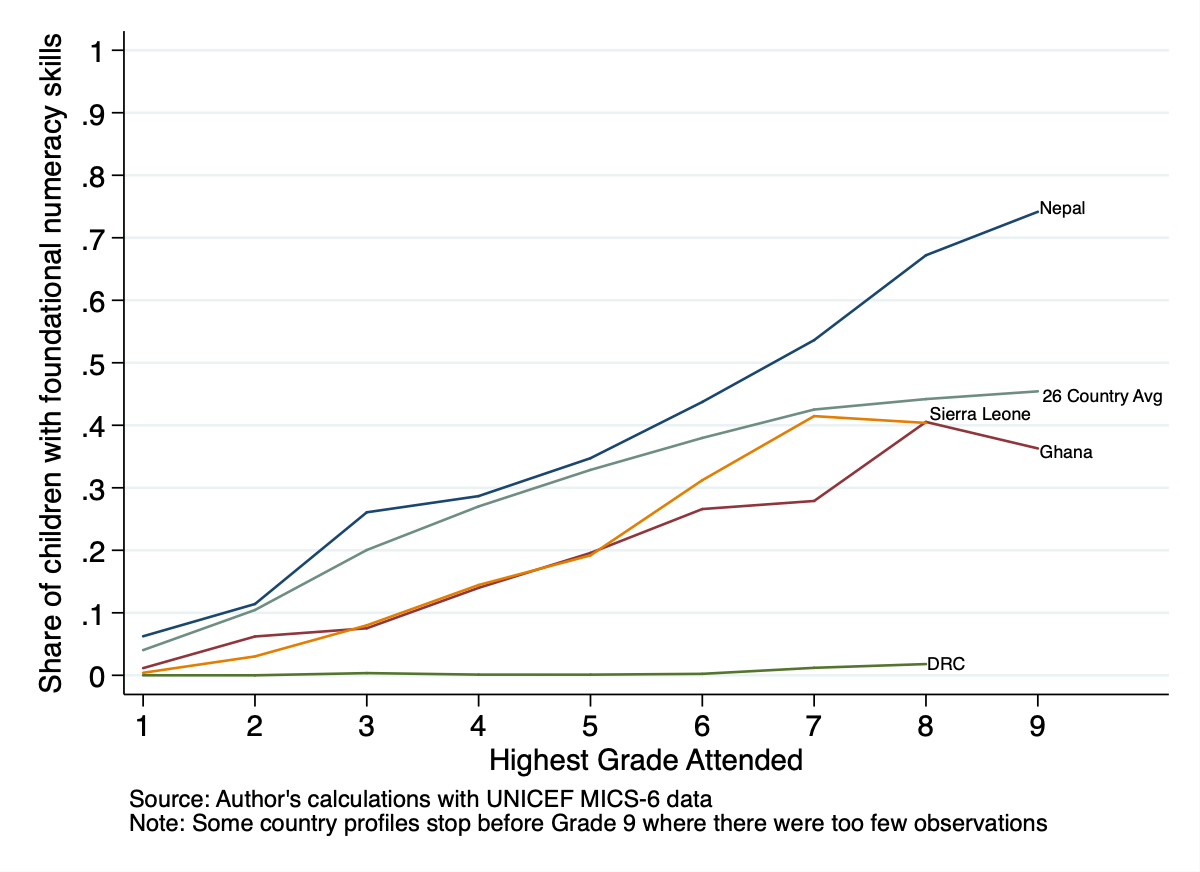




(file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1
> -Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/num.pdf writt
> en in PDF format)


In [3]:
*Learning profiles of foundational numeracy in 26 countries show that learning is low, but varies widely 
graph twoway line num_all_Nepal years_educ if years_educ<10 & years_educ>0, sort || ///
line num_all_Ghana years_educ if years_educ<10 & years_educ>0, sort || ///
line num_all_DRC years_educ if years_educ<9 & years_educ>0, sort || ///
line num_all_SierraLeone years_educ if years_educ<9 & years_educ>0, sort || ///
line num_all_avg years_educ if years_educ<10 & years_educ>0, sort ///
ylabel(0(.1)1, gmax angle(horizontal)) xlabel(1(1)9) ytitle("Share of children with foundational numeracy skills") xtitle("Highest Grade Attended") ///
note("Source: Author's calculations with UNICEF MICS-6 data" "Note: Some country profiles stop before Grade 9 where there were too few observations") legend(off) scheme(s2color) xscale(range(1 10)) graphregion(color(white)) ///
text(.75 9 "Nepal", placement (east) size(vsmall)) ///
text(.36 9 "Ghana", placement (east) size(vsmall)) ///
text(.02 8 "DRC", placement (east) size(vsmall)) ///
text(.42 8 "Sierra Leone", placement (east) size(vsmall)) ///
text(.45 9 "26 Country Avg", placement (east) size(vsmall)) 
graph export "$graph/num.pdf", as(pdf) replace

### Interpretation
- The learning crisis is worse than we think it is.  Many learning trajectories are too flat, meaning that students learn little each year they spend in school.  Far too many students in developing countries will not acquire foundational literacy and numeracy by the time they finish primary or even lower secondary school, and most countries will fall well short of the SDG learning goals.
- But learning varies widely:  Some countries, even at relatively low levels of development, have successfully created education systems that impart foundational skills to most children.  This is in some ways a hopeful message: the challenge low-performing countries face is not impossible, but it requires systems to realign themselves to deliver learning.

## Graph of Descriptive LTs (alternative) - Numeracy by Grade

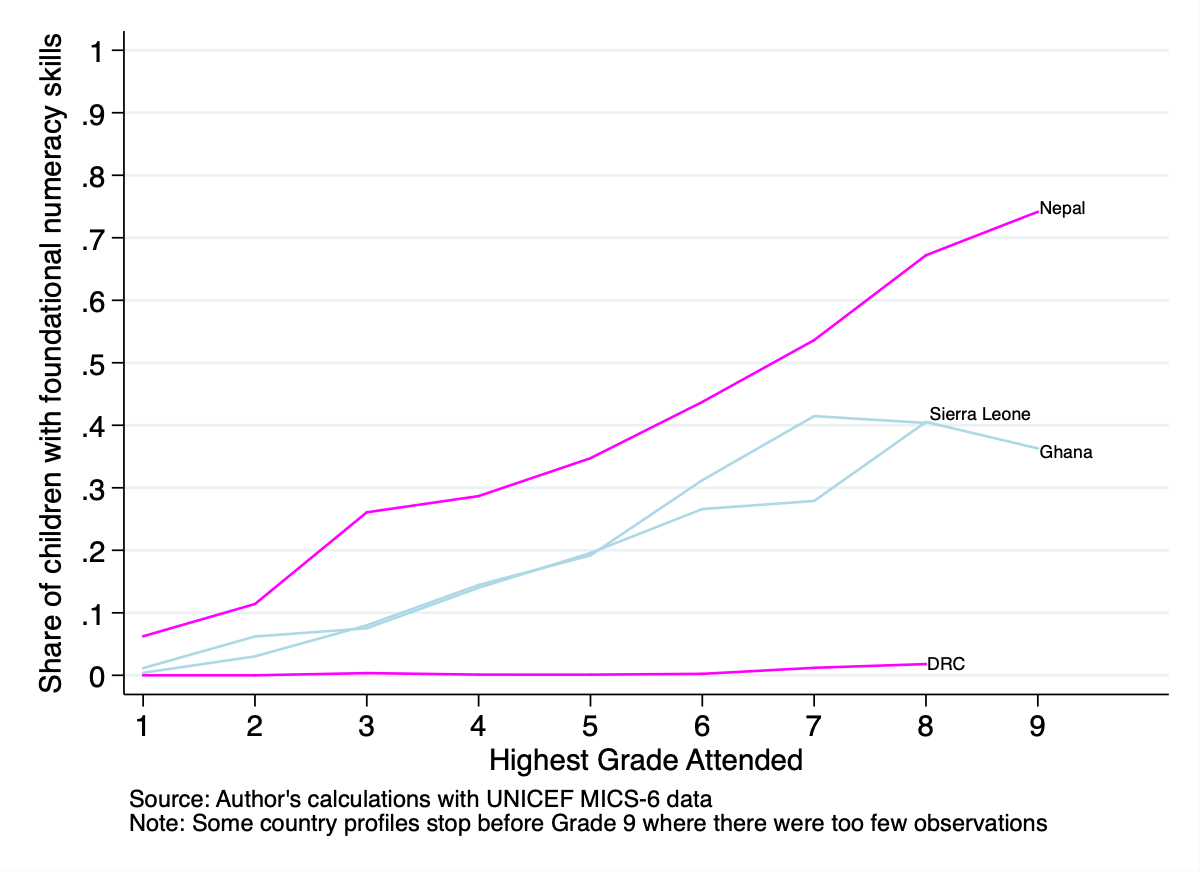




(file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1
> -Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/num_diff.pdf 
> written in PDF format)


In [4]:
*Learning profiles of foundational numeracy in 26 countries show that differences emerge early, and grow over time 
graph twoway (line num_all_Nepal years_educ if years_educ<10 & years_educ>0, sort lcolor(magenta)) || ///
(line num_all_Ghana years_educ if years_educ<10 & years_educ>0, sort lcolor(ltblue)) || /// 
(line num_all_DRC years_educ if years_educ<9 & years_educ>0, sort lcolor(magenta)) || /// 
(line num_all_SierraLeone years_educ if years_educ<9 & years_educ>0, sort lcolor(ltblue) ///
ylabel(0(.1)1, gmax angle(horizontal)) xlabel(1(1)9) ytitle("Share of children with foundational numeracy skills") xtitle("Highest Grade Attended") graphregion(color(white)) ///
note("Source: Author's calculations with UNICEF MICS-6 data" "Note: Some country profiles stop before Grade 9 where there were too few observations") legend(off) scheme(s2color) xscale(range(1 10)) text(.75 9 "Nepal", placement (east) size(vsmall)) text(.36 9 "Ghana", placement (east) size(vsmall)) text(.42 8 "Sierra Leone", placement (east) size(vsmall)) text(.02 8 "DRC", placement (east) size(vsmall)) )
graph export "$graph/num_diff.pdf", as(pdf) replace

### Interpretation
- Learning varies dramatically across countries
- Cross-country differences in learning develop early, and tend to grow over time.  This is visible in learning trajectories that flatten out early and never recover. There are very few learning trajectories that "catch up" in the later years.  Countries fall behind early, and then tend to stay behind.  
- This is because learning is cumulative: foundational literacy and numeracy are the gateway to higher level skills, and can set a country (or individual child) on a steeper overall trajectory.  Thinking about learning dynamics over time is a stark contrast to the way we usually talk about and depict learning.  Usually we measure learning at one point in time, often very late in the schooling cycle, and often using data from a school-leaving assessment.     
- This pattern in learning trajectories highlights the need for early intervention. You can’t fix Grade 9 in Grade 8: improvements are needed in the early primary years to enable later learning.

### Related Literature
![](DHS.png)
[Pritchett & Sandefur (2020)](https://www.sciencedirect.com/science/article/pii/S0738059320304016)

## [PLACEHOLDER - code needs updating] Graph of Numeracy Within Grades

- Our goal is to create a graph showing the distribution of student learning levels within grades
- We are using a literacy variable - percent of words read correctly in the story - for the first and only time in the workshop.  This is because it's a continuous variable (vs. binary variable), the only one we've constructed so far.   

### Interpretation

- Learning varies dramatically within countries, and even within classrooms
- Children fall behind early, and tend to stay behind.
- This points to the critical importance of aligning the level of instruction with children’s learning levels, either by reorienting curricula to match the rate at which children learn, or through changes to other components of instruction

### Related Literature
![](mindspark.png)
[Muralidharan et al (2019)](https://www.aeaweb.org/articles/pdf/doi/10.1257/aer.20171112)

- This is baseline data from a pilot intervention in Delhi, India
- The blue line is the curriculum, red line is actual average learning
- The learning profile is flat compared to where the curriculum expects students to be
- Children who don’t gain foundational skills early still have not gained them by grade 8, with many still at grade 2/3 levels
- By grade 8/9, there is a massive variation in skills, spanning about 5-6 grade levels
- By grade 8, children are on average 4 years behind the curriculum

# Access vs. Learning Simulation

## Conceptual Overview

- We are trying to compare 3 different possible sets of policy priorities here:
    - Policies that maintain current foundational numeracy
    - Simulating policies that seek to increase foundational numeracy by following an access agenda.  This simulation asks how much additional learning we could expect if those kids who never went to school, or who dropped out, instead had the average literacy for kids their same age who are still in school
    - Simulating policies that seek to increase foundational numeracy by following a learning agenda.  This simulation asks how much additional learning we could expect if the kids currently in school learned more each year?  Specifically, what if they learned as much each year as kids do in Nepal? Or restated in technical jargon, what if each country maintained its current atttainment profile, but had the learning profile of Nepal?  Nepal is an arbitrary choice, but it is the relatively large LMIC with the highest foundational numeracy in the dataset, so it represents a kind of realistic goal for lower-achieving systems.  (There are other higher achieving countries that are either higher income, like Thailand, or small, like Kyrgyzstan).    

- An important concept underpinning this simulation: cohort learning is the product of grade attainment and learning per grade.  Intuitively, learning can go up in two different ways.  You can do things to make kids stay in school longer (improve the attainment profile), or you can do things to make kids learn more each year they spend in school (steepen the learning trajectory).
- Stated as a mathematical identity: 

![](lpxap.png)

Where αg is the share of cohort with level g as their highest level attained, and sg is the share of a cohort with highest schooling attainment of g who can read.  In words, the percentage of (eg) 12-year-olds who have foundational literacy = (% 12-year-olds in Grade 1) * (% of 12-year-olds in Grade 1 that passed the literacy test), etc., summed for every grade 

## Setup

In [5]:
cd "$cleaned"

*Putexcel set "$file", modify sets all future putexcel commands to edit the identified excel sheet
putexcel set "$table/access_sim_numeracy", modify 

*This sets up the excel sheet where we will run the simulations.  This is modelled in the table below.  
putexcel A2=("26 Country Avg") A3=("Bangladesh") A4=("CAR") A5=("Chad") A6=("DRC") A7=("Ghana") A8=("Guinea Bissau") A9=("Kiribati") A10=("Kosovo") A11=("Kyrgyzstan") A12=("Lesotho") A13=("Madagascar") A14=("Mongolia") A15=("Nepal") A16=("North Macedonia") A17=("Palestine") A18=("Punjab") A19=("Sao Tome & Principe") A20=("Sierra Leone") A21=("Suriname") A22=("Thailand") A23=("The Gambia") A24=("Togo") A25=("Tonga") A26=("Tunisia") A27=("Turkmenistan") A28=("Zimbabwe") /// 
B1=("Current Numeracy Rate") C1=("Projected Numeracy Rate Following an Access Agenda (all 13/14-year-olds go to and stay in school)") D1=("Projected Numeracy Rate Following a Learning Agenda (13/14-year-olds learn as much each year as in Nepal)")



/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learn
> ing Trajectories/PAL/Learning Trajectories Workshop/Data/Cleaned


file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-
> Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/Tables/access_
> sim_numeracy.xlsx saved


|                     | Current Numeracy | Numeracy if all 13/14-Year-Olds Attended and Stayed In-school | Numeracy with the Learning Profile of Nepal |
|:-------------------:|:----------------:|:-------------------------------------------------------------:|:------------------------------------------------:|
|    26 Country Avg   |                  |                                                               |                                                  |
|      Bangladesh     |                  |                                                               |                                                  |
|         CAR         |                  |                                                               |                                                  |
|         Chad        |                  |                                                               |                                                  |
|         DRC         |                  |                                                               |                                                  |
|        Ghana        |                  |                                                               |                                                  |
|    Guinea Bissau    |                  |                                                               |                                                  |
|       Kiribati      |                  |                                                               |                                                  |
|        Kosovo       |                  |                                                               |                                                  |
|      Kyrgyzstan     |                  |                                                               |                                                  |
|       Lesotho       |                  |                                                               |                                                  |
|      Madagascar     |                  |                                                               |                                                  |
|       Mongolia      |                  |                                                               |                                                  |
|        Nepal        |                  |                                                               |                                                  |
|   North Macedonia   |                  |                                                               |                                                  |
|      Palestine      |                  |                                                               |                                                  |
|        Punjab       |                  |                                                               |                                                  |
| Sao Tome & Principe |                  |                                                               |                                                  |
|     Sierra Leone    |                  |                                                               |                                                  |
|       Suriname      |                  |                                                               |                                                  |
|       Thailand      |                  |                                                               |                                                  |
|      The Gambia     |                  |                                                               |                                                  |
|         Togo        |                  |                                                               |                                                  |
|        Tonga        |                  |                                                               |                                                  |
|       Tunisia       |                  |                                                               |                                                  |
|     Turkmenistan    |                  |                                                               |                                                  |
|       Zimbabwe      |                  |                                                               |                                                  |

## Current Numeracy, and Simulated Numeracy Following an Access Agenda (Columns B & C)

In [6]:
qui {

*Setup a loop through the 26 country datasets
local files clean_fs_bangladesh clean_fs_CAR clean_fs_chad clean_fs_DRC clean_fs_ghana clean_fs_guineabissau clean_fs_kiribati clean_fs_kosovo clean_fs_kyrgyzstan clean_fs_lesotho clean_fs_madagascar clean_fs_mongolia clean_fs_nepal clean_fs_northmacedonia clean_fs_palestine clean_fs_punjab clean_fs_saotome_principe clean_fs_sierraleone clean_fs_suriname clean_fs_thailand clean_fs_thegambia clean_fs_togo clean_fs_tonga clean_fs_tunisia clean_fs_turkmenistan clean_fs_zimbabwe
local numbers 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
local n : word count `files'
forvalues i = 1/`n' {
	local a : word `i' of `files'
	local b : word `i' of `numbers'
use `a', clear
 
*Calculate current numeracy, and put into the excel sheet in column B
mean numbskill [pw=fsweight] if schage==13 | schage==14
putexcel B`b'=matrix(e(b))
 
*Simulate numeracy under an access agenda

*This calculates average numeracy for 13/14-year-olds still in school
mean numbskill [pw=fsweight] if inschool==1 & (schage==13 | schage==14)
*This uses the results of the previous command, stored in matrix e(b)
matrix b = e(b)
local num = b[1,1]
*This assigns average numeracy to all 13/14-year-olds who never went to school  
replace numbskill= `num' if noschool==1 & (schage==13 | schage==14)
*This assigns average numeracy to all 13/14-year-olds who have dropped out
replace numbskill= `num' if OOS==1 & (schage==13 | schage==14)
*This recalculates average numeracy for 13/14-year-olds, and puts it into the excel sheet in column C
mean numbskill [pw=fsweight] if schage==13 | schage==14
putexcel C`b'=matrix(e(b))
}
    
}

## Simulated Numeracy Following a Learning Agenda (Column D)

In [7]:
*Our goal is to create another dataset with Nepal's learning trajectory and each country's attainment profile 

*In this box, we start by creating the learning trajectory for Nepal.  
putexcel set "$means/learning_sim_numeracy", modify
putexcel A1=("grade") A2=(-1) A3=(0) A4=(1) A5=(2) A6=(3) A7=(4) A8=(5) A9=(6) A10=(7) A11=(8) A12=(9) A13=(10) A14=(11) A15=(12) A16=(13) A17=(14)

*Import the learning profile of Nepal into the excel sheet (xtable command well explained here: https://weverthonmachado.github.io/xtable/)
use clean_fs_nepal, clear
xtable years_educ [pw=fsweight] if schage==13 | schage==14, c (mean numbskill) noput
putexcel B1=("nepal_lp_num") B2=matrix(r(xtable))

*Convert the excel sheet to a dta file
clear
cd "$means"
import excel using "learning_sim_numeracy", firstrow sheet(Sheet1)
save "learning_sim_numeracy", replace



file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-
> Learning Trajectories/PAL/Learning Trajectories Workshop/Data/Means/learning_s
> im_numeracy.xlsx saved



--------------------------
years_edu |
c         | mean(numbsk~l)
----------+---------------
No school |              0
      ECE |              0
  Grade 1 |              0
  Grade 2 |       .0402538
  Grade 3 |       .2417168
  Grade 4 |       .1262976
  Grade 5 |       .3559421
  Grade 6 |       .3290299
  Grade 7 |       .4668518
  Grade 8 |       .6370185
  Grade 9 |       .7457738
 Grade 10 |       .8145122
 Grade 11 |       .9030452
--------------------------

file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-
> Learning Trajectories/PAL/Learning Trajectories Workshop/Data/Means/learning_s
> im_numeracy.xlsx saved


/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learn
> ing Trajectories/PAL/Learning Trajectories Workshop/Data/Means



In [8]:
qui {

*Now we create separate datasets per country of the attainment profile of 13/14-year-olds 
*Note: The results of svy: tab for each country can't be directly exported into the same excel file / dataset because it proved infuriatingly hard to preserve grades with zero kids in them.  For example, the command tabcount adds zeroes, but can't be used with weights.  What's here is a clunky but automated workaround.

*Setup a loop through all countries
local files clean_fs_bangladesh clean_fs_CAR clean_fs_chad clean_fs_DRC clean_fs_ghana clean_fs_guineabissau clean_fs_kiribati clean_fs_kosovo clean_fs_kyrgyzstan clean_fs_lesotho clean_fs_madagascar clean_fs_mongolia clean_fs_nepal clean_fs_northmacedonia clean_fs_palestine clean_fs_punjab clean_fs_saotome_principe clean_fs_sierraleone clean_fs_suriname clean_fs_thailand clean_fs_thegambia clean_fs_togo clean_fs_tonga clean_fs_tunisia clean_fs_turkmenistan clean_fs_zimbabwe
local country Bangladesh CAR Chad DRC Ghana GuineaBissau Kiribati Kosovo Kyrgyzstan Lesotho Madagascar Mongolia Nepal NorthMacedonia Palestine Punjab SaoTomeandPrincipe SierraLeone Suriname Thailand TheGambia Togo Tonga Tunisia Turkmenistan Zimbabwe
local n : word count `files'
forvalues i = 1/`n' {
	local a : word `i' of `files'
	local b : word `i' of `country'
cd "$cleaned"
use `a', clear
putexcel set "$means/access/`b'", modify 
putexcel A1=("grade") B1=("`b'")
*This is a simple tab that returns the (weighted) proportion of 13/14-year-olds in each grade - the attainment profile!
svyset [pw=fsweight]
svy: tab years_educ if FL28==1 & (schage==13 | schage==14)
*matrix list e(Row) returns a 1-by-X matrix with grades.  We want to transpose it into an X-by-1 matrix.
matrix z = e(Row)'
putexcel A2 = matrix (z)
*matrix list e(Prop) returns an X-by-1 matrix with the proportion of 13-14-yr-olds per grade
putexcel B2 = matrix (e(Prop))
*Convert the excel into dta file
clear
cd "$means/access"
import excel using "`b'", firstrow sheet(Sheet1)
save "`b'", replace
}
    
}

In [9]:
qui {
    
*Merge country attainment profiles with Nepal's learning profile into single dataset
cd "$means"
use learning_sim_numeracy, clear
cd "$means/access"
foreach file in Bangladesh CAR Chad DRC Ghana GuineaBissau Kiribati Kosovo Kyrgyzstan Lesotho Madagascar Mongolia Nepal NorthMacedonia Palestine Punjab SaoTomeandPrincipe SierraLeone Suriname Thailand TheGambia Togo Tonga Tunisia Turkmenistan Zimbabwe {
merge 1:1 grade using "`file'"
drop _merge
save "learning_sim_numeracy", replace
}

} 
*The command below is a little "magic" that's part of the Jupyter kernel for stata - it displays the first 10 rows of the dataset
*See: https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/

In [10]:
%head

,grade,nepal_lp_num,Bangladesh,CAR,Chad,DRC,Ghana,GuineaBissau,Kiribati,Kosovo,Kyrgyzstan,Lesotho,Madagascar,Mongolia,Nepal,NorthMacedonia,Palestine,Punjab,SaoTomeandPrincipe,SierraLeone,Suriname,Thailand,TheGambia,Togo,Tonga,Tunisia,Turkmenistan,Zimbabwe
1,-1,0,.0175937792467503,.1072890698751845,.4537448014566264,.0450485896858183,.0172762234239407,.104368969055947,.,.,.0057302014375019,.0048791841405876,.0938221690794391,.0060692232743612,.0074510944772604,.,.001249992612569,.1038349658469084,.0041326280412511,.0957930088626834,.,.0003335086514796,.1351048173116565,.0372654546827905,.,.0030541722430767,.,.0048748244092684
2,0,0,.0014193389431483,.,.0012180240293362,.0007570661662037,.0025494956880439,.,.,.,.,.,.0008883188520071,.,.000379804276442,.,.,.0228530733221232,.,.,.,.,.0023514714738189,.,.,.,.,.
3,1,0,.0040053879527819,.0139862940653873,.0095936160302211,.0050209406976162,.0111070336911084,.0406568643886196,.,.,.,.0011999025170542,.0437863054265602,.,.0111020300426775,.,.,.0076549135962125,.000838992465872,.00496898250811,.,.,.0014813749692486,.0095984850664335,.,.0015566532909433,.,.
4,2,.0402537807822227,.0153232297711204,.0847925563955914,.0303550732511328,.0216999489180427,.0095752455018751,.1145290479811214,.,.0025097992742321,.,.0053342383369091,.0894115291624034,.0044990333086297,.0219348617267829,.,.,.0181360023696253,.0048083870662715,.0094627108519136,.0031528862968844,.0001492631956332,.046646759916952,.0217066863427623,.,.0012108634097585,.,.0058094838077083
5,3,.2417168468236923,.0265331662934518,.1255641265873952,.0866724610329963,.0588088618413278,.0364484274047618,.1525849573069739,.0038454944773744,.,.,.0140571105518274,.1043169166862272,.0007644538320086,.0204953985469043,.,.,.0443125011214732,.0167171706323865,.0398908693727953,.0187870881808716,.0001437164864492,.0506738212097599,.0234747345971689,.,.003551393659126,.,.0144066953682139
6,4,.1262975931167603,.0445617512710692,.1627843673435596,.1046032239565046,.0809644794070329,.0913342325255008,.1792202261619751,.0036863556956812,.011459827181747,.,.0240234658122115,.1012527415183496,.0007662401108194,.0307037902496132,.,.,.0500283187872892,.0297306087754851,.0731479146569267,.015113520399497,.0002442407046756,.1133511247221789,.0545530105255179,.,.0093096431796408,.,.0123392360410405
7,5,.3559421300888062,.0845413004474838,.1828741332943421,.1023403513857852,.1358438395428701,.1530378177041498,.1843327704482699,.007979941583155,.,.,.0522009387769894,.1870754816484753,.0049822156060386,.0605920416464524,.0019699472110782,.002346079393145,.1092832624452614,.0840636401963111,.135834383459766,.1170243330768744,.0030747921726897,.1256567898483708,.1334295903297697,.,.0193762362156806,.,.0403864016215633
8,6,.3290299475193024,.1020279782317625,.1791863103688698,.0856313772530441,.1625545450499351,.1556740473840219,.115858691057706,.067314307153067,.0128281805473599,.022772339092093,.1185561048237244,.0999431398163003,.0039691113020366,.0816959894903716,.0090243182907182,.0035663934537262,.0750425759680581,.1721952897376944,.1727385918140865,.1945226118742984,.0175698488969324,.1298642664135831,.1682506484637941,.0012723776152118,.0696435656095957,.0142117264867704,.1000641204001582
9,7,.4668517708778381,.1940171670312091,.0868952364685665,.0569620068955114,.20008033380604,.2201527703410096,.0656988751719623,.1884539591599897,.0398705465887879,.2308602907739333,.2807723345693674,.087153764895596,.0394110616132034,.1683190717427562,.0074609643266301,.0451125838882182,.1245951322795045,.286558883889944,.1910307483346926,.1980343288901761,.2122395869284061,.1850005109005232,.2168537107985989,.0315849159733566,.1873825171711325,.6393065571567392,.2973882836083695
10,8,.6370185017585754,.2896069307419128,.0338987271367015,.0443202080881525,.1800982650304666,.2120056602963465,.0330600439945463,.536927506938031,.4734087579804478,.514092486625918,.3283243874019543,.1011223525605684,.3627220067637876,.278746331395026,.4258846357137113,.3151081383783265,.190248

In [11]:
qui {
*Now we can get the simulated learning trajectory for each country: the simple product of Nepal's learning trajectory * each country's attainment profile
foreach x in Bangladesh CAR Chad DRC Ghana GuineaBissau Kiribati Kosovo Kyrgyzstan Lesotho Madagascar Mongolia Nepal NorthMacedonia Palestine Punjab SaoTomeandPrincipe SierraLeone Suriname Thailand TheGambia Togo Tonga Tunisia Turkmenistan Zimbabwe {
gen `x'_sim = nepal_lp_num * `x'
}
    
}

In [12]:
qui {
    
*The final step is to sum up numeracy rates in all grades to get the simulated counterfactual numeracy for 13/14-year-olds in each country, and then export that into the original table 
putexcel set "$table/access_sim_numeracy", modify
local vars Bangladesh_sim CAR_sim Chad_sim DRC_sim Ghana_sim GuineaBissau_sim Kiribati_sim Kosovo_sim Kyrgyzstan_sim Lesotho_sim Madagascar_sim Mongolia_sim Nepal_sim NorthMacedonia_sim Palestine_sim Punjab_sim SaoTomeandPrincipe_sim SierraLeone_sim Suriname_sim Thailand_sim TheGambia_sim Togo_sim Tonga_sim Tunisia_sim Turkmenistan_sim Zimbabwe_sim
local numbers 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
local n : word count `vars'
forvalues i = 1/`n' {
	local a : word `i' of `vars'
	local b : word `i' of `numbers'
sum `a'
putexcel D`b' = (`r(sum)')
}

}

## Graph

![](access.png)

I created the bar graph in Excel in our "access_sim_numeracy" sheet.  The manual steps are: 
- Calculate the 26 country average
- Create a simple bar graph
- Format  to taste.  Note you should only have to do the manual formatting for the graph once, and then when you re-run your code the numbers and graph will automatically update
- Alternatively you could do the graphing in Stata 

## Interpretation

- Schooling ain’t learning: because many children learn little each year in school, spending more years in school will not improve learning by very much.  Expanding access alone often “shifts children from not learning while out of school…to not learning while in school” ( Kaffenberger and Pritchett, 2020). 
- In most countries, steepening the learning trajectory (so that kids in school learn more per year) would result in far more hypothetical learning than an access agenda.  
- However, this depends on the context.  In the (few) countries with steep learning trajectories and low enrollment, an access agenda would help raise learning.     
- Moreover, these simulations are likely overly optimistic in 2 ways: 
     1) Kids who never go to school or dropout are likely to be lower-performing than their in-school peers.  If these kids actually went to school, as in our simulations, they probably would learn less than the average kid does now (particularly in later grades, where only stronger students have persisted and are still in school). 
     2) School systems might have trouble absorbing all these new students and maintaining constant quality, especially if the influx of students was large.  
     
### Related Literature
![](FII.png)
[Kaffenberger & Pritchett (2020)](https://www.sciencedirect.com/science/article/pii/S0738059320304314?via%3Dihub)

- This graph draws on the Financial Inclusion Insights (FII) dataset of retrospective adult literacy
- On average, steepening the learning profile increased literacy at 2.6 times the rate of reaching universal primary completion

# Equity

## Gender Differences in Numeracy by Grade

In [13]:
*Use the prepared dataset of country means
use "$means/years_educ", clear

*Create cross-country average learning trajectories for boys and girls
egen num_f_avg=rmean(num_f_*)
lab var num_f_avg "Average of 26 Countries"
egen num_m_avg=rmean(num_m_*)
lab var num_m_avg "Average of 26 Countries"



(4 missing values generated)


(3 missing values generated)



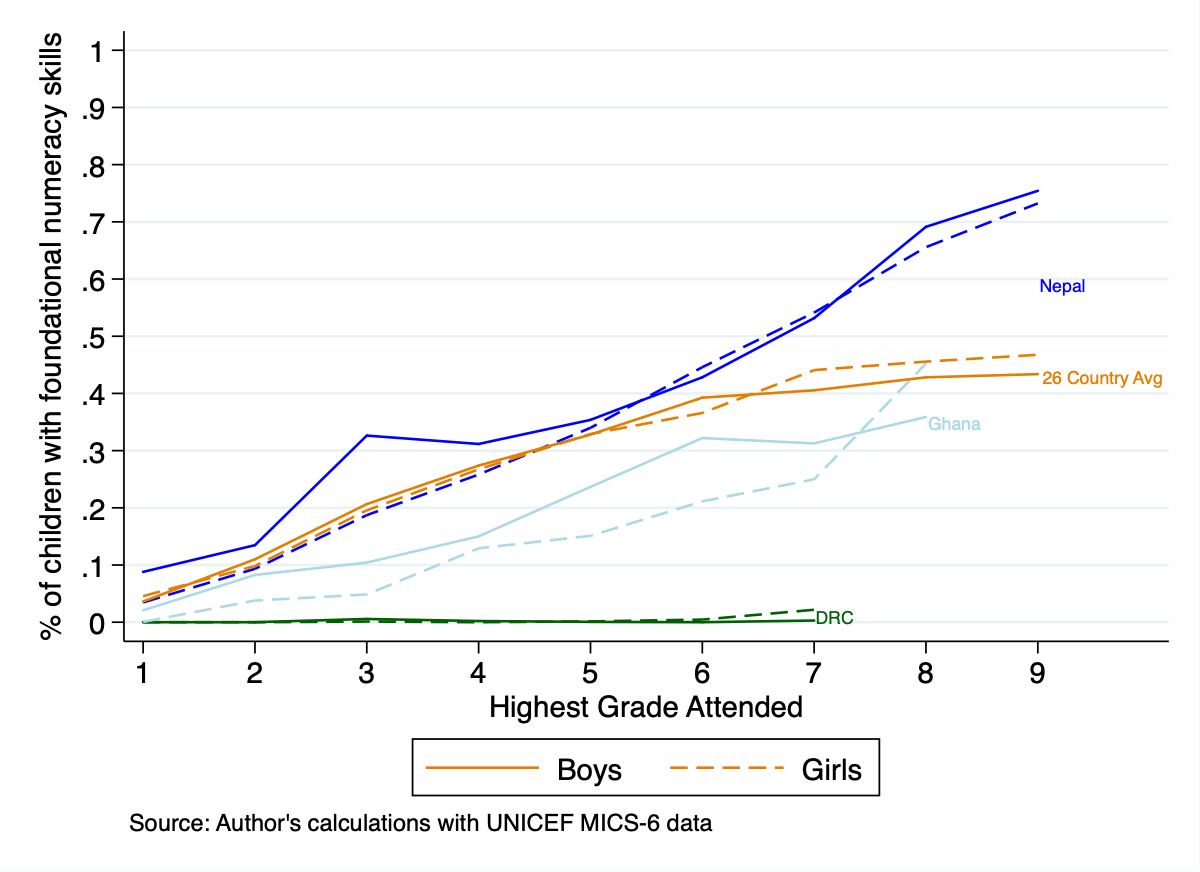




(file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1
> -Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/num_gender.pd
> f written in PDF format)


In [14]:
*In most countries, boys and girls are learning similar amounts as they progress through school
graph twoway (line num_f_Nepal years_educ if years_educ<10 & years_educ>0, sort lcolor(blue) lpattern(dash)) || (line num_m_Nepal years_educ if years_educ<10 & years_educ>0, sort lcolor(blue)) || ///  
(line num_f_DRC years_educ if years_educ<8 & years_educ>0, sort lcolor(dkgreen) lpattern(dash)) || (line num_m_DRC years_educ if years_educ<8 & years_educ>0, sort lcolor(dkgreen)) || /// 
(line num_f_Ghana years_educ if years_educ<9 & years_educ>0, sort lcolor(ltblue) lpattern(dash)) || (line num_m_Ghana years_educ if years_educ<9 & years_educ>0, sort lcolor(ltblue)) || ///  
(line num_f_avg years_educ if years_educ<10 & years_educ>0, sort lcolor(dkorange) lpattern(dash)) || (line num_m_avg years_educ if years_educ<10 & years_educ>0, sort lcolor(dkorange) ///
ylabel(0(.1)1, gmax angle(horizontal)) xlabel(1(1)9) ytitle("% of children with foundational numeracy skills") xtitle("Highest Grade Attended") graphregion(color(white)) ///
note("Source: Author's calculations with UNICEF MICS-6 data") xscale(range(1 10)) legend(order(8 7) label(7 "Girls") label(8 "Boys")) ///
text(.59 9 "Nepal", placement(east) size(vsmall) color(blue)) text(.43 9 "26 Country Avg", placement(east) size(vsmall) color(dkorange)) ///
text(.35 8 "Ghana", placement(east) size(vsmall) color(ltblue)) text(.01 7 "DRC", placement(east) size(vsmall) color(dkgreen)) )
graph export "$graph/num_gender.pdf", as(pdf) replace

### Interpretation
- In most countries, the learning crisis is equally seriously for both girls *and* boys.
- However, there are specific countries, such as Ghana in this dataset, where gender is more of a dividing line for who is learning. 

## Gender Differences in Numeracy by Grade (alternative)

In [15]:
qui {
    
*Generate a single variable that represents the difference between male-female
foreach name in Bangladesh CAR Chad DRC Ghana GuineaBissau Kiribati Kosovo Kyrgyzstan Lesotho Madagascar Mongolia Nepal NorthMacedonia Palestine Punjab SaoTomeandPrincipe SierraLeone Suriname Thailand TheGambia Togo Tonga Tunisia Turkmenistan Zimbabwe {
gen num_mfdiff_`name' = num_m_`name' - num_f_`name'
la var num_mfdiff_`name' "`name'"
}
    
}

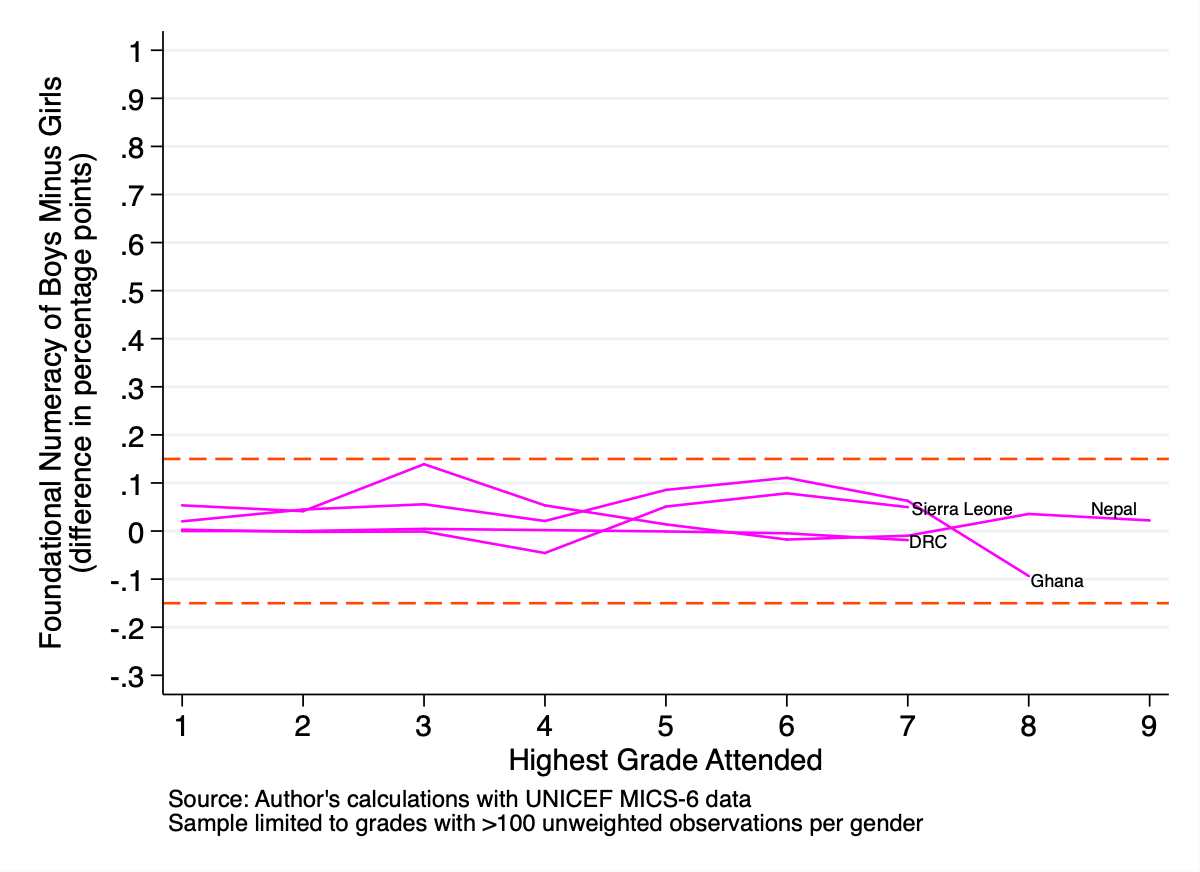




(file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1
> -Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/gender_diff.p
> df written in PDF format)


In [16]:
*Gender differences in learning are small in almost all countries and grades
graph twoway line num_mfdiff_Nepal years_educ if years_educ<10 & years_educ>0, sort lcolor(magenta) || line num_mfdiff_Ghana years_educ if years_educ<9 & years_educ>0, sort lcolor(magenta) || ///
line num_mfdiff_DRC years_educ if years_educ<8 & years_educ>0, sort lcolor(magenta) || line num_mfdiff_SierraLeone years_educ if years_educ<8 & years_educ>0, sort lcolor(magenta) ///
text(.05 8.5 "Nepal", placement (east) size(vsmall)) ///
text(-.1 8 "Ghana", placement (east) size(vsmall)) ///
text(-.02 7 "DRC", placement (east) size(vsmall)) ///
text(.05 7 "Sierra Leone", placement (east) size(vsmall)) ///
ylabel(-.3(.1)1, gmax angle(horizontal)) xlabel(1(1)9) ytitle("Foundational Numeracy of Boys Minus Girls" "(difference in percentage points)") yscale(titlegap(-10)) xtitle("Highest Grade Attended") ///
note("Source: Author's calculations with UNICEF MICS-6 data" "Sample limited to grades with >100 unweighted observations per gender") legend(off) yline(-.15, lwidth(medium) lpattern(dash) lcolor(orange_red)) yline(.15, lwidth(medium) lpattern(dash) lcolor(orange_red)) graphregion(color(white))
graph export "$graph/gender_diff.pdf", as(pdf) replace

### Interpretation
- The message is very similar to the previous graph. We see again that any differences in learning between boys and girls are relatively small, always less than .15 percentage points
- More often than not it is girls who are learning more than boys (when the difference is negative)

### Related Literature
![](uwezoone.png)
[Akmal & Pritchett (2021)](https://www.sciencedirect.com/science/article/pii/S0738059321000031)

## How Much Does Inequality Between Groups Explain the Learning Crisis? 

### Setup

In [17]:
*The strategy here is to create a dataset of mean numeracy for advantaged vs. disavantaged groups (of all ages/grades)
putexcel set "$means/equality_num_overall", modify
putexcel A2=("Bangladesh") A3=("CAR") A4=("Chad") A5=("DRC") A6=("Ghana") A7=("Guinea Bissau") A8=("Kiribati") A9=("Kosovo") A10=("Kyrgyzstan") A11=("Lesotho") A12=("Madagascar") A13=("Mongolia") A14=("Nepal") A15=("North Macedonia") A16=("Palestine") A17=("Punjab") A18=("Sao Tome & Principe") A19=("Sierra Leone") A20=("Suriname") A21=("Thailand") A22=("The Gambia") A23=("Togo") A24=("Tonga") A25=("Tunisia") A26=("Turkmenistan") A27=("Zimbabwe") ///
B1=("num_boys") C1=("num_girls") D1=("num_urban") E1=("num_rural") F1=("num_rich") G1=("num_poor") H1=("num_ad") I1=("num_disad") J1=("num")




file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-
> Learning Trajectories/PAL/Learning Trajectories Workshop/Data/Means/equality_n
> um_overall.xlsx saved


**Outline of the Dataset**

|                       | num_boys | num_girls | num_urban | num_rural | num_rich | num_poor | num_ad | num_disad | num |
|:---------------------:|:--------:|:---------:|:---------:|:---------:|:--------:|:--------:|:------:|:---------:|:---:|
|       Bangladesh      |          |           |           |           |          |          |        |           |     |
|          CAR          |          |           |           |           |          |          |        |           |     |
|          Chad         |          |           |           |           |          |          |        |           |     |
|          DRC          |          |           |           |           |          |          |        |           |     |
|         Ghana         |          |           |           |           |          |          |        |           |     |
|    Guinea   Bissau    |          |           |           |           |          |          |        |           |     |
|        Kiribati       |          |           |           |           |          |          |        |           |     |
|         Kosovo        |          |           |           |           |          |          |        |           |     |
|       Kyrgyzstan      |          |           |           |           |          |          |        |           |     |
|        Lesotho        |          |           |           |           |          |          |        |           |     |
|       Madagascar      |          |           |           |           |          |          |        |           |     |
|        Mongolia       |          |           |           |           |          |          |        |           |     |
|         Nepal         |          |           |           |           |          |          |        |           |     |
|   North   Macedonia   |          |           |           |           |          |          |        |           |     |
|       Palestine       |          |           |           |           |          |          |        |           |     |
|         Punjab        |          |           |           |           |          |          |        |           |     |
| Sao Tome   & Principe |          |           |           |           |          |          |        |           |     |
|      Sierra Leone     |          |           |           |           |          |          |        |           |     |
|        Suriname       |          |           |           |           |          |          |        |           |     |
|        Thailand       |          |           |           |           |          |          |        |           |     |
|       The Gambia      |          |           |           |           |          |          |        |           |     |
|          Togo         |          |           |           |           |          |          |        |           |     |
|         Tonga         |          |           |           |           |          |          |        |           |     |
|        Tunisia        |          |           |           |           |          |          |        |           |     |
|      Turkmenistan     |          |           |           |           |          |          |        |           |     |
|        Zimbabwe       |          |           |           |           |          |          |        |           |     |

### Fill in dataset

In [18]:
qui {
    
*Loop through countries to fill in dataset
cd "$cleaned"
local files clean_fs_bangladesh clean_fs_CAR clean_fs_chad clean_fs_DRC clean_fs_ghana clean_fs_guineabissau clean_fs_kiribati clean_fs_kosovo clean_fs_kyrgyzstan clean_fs_lesotho clean_fs_madagascar clean_fs_mongolia clean_fs_nepal clean_fs_northmacedonia clean_fs_palestine clean_fs_punjab clean_fs_saotome_principe clean_fs_sierraleone clean_fs_suriname clean_fs_thailand clean_fs_thegambia clean_fs_togo clean_fs_tonga clean_fs_tunisia clean_fs_turkmenistan clean_fs_zimbabwe 
local numbers 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
local n : word count `files'
forvalues i = 1/`n' {
	local a : word `i' of `files'
	local b : word `i' of `numbers'
use `a', clear

*Gender (columns B & C)
mean numbskill [pw=fsweight] if HL4==1 & FL28==1
putexcel B`b'=matrix(e(b)) 

mean numbskill [pw=fsweight] if HL4==2 & FL28==1
putexcel C`b'=matrix(e(b)) 

*Urban-rural (Columns D & E)
mean numbskill [pw=fsweight] if HH6==1 & FL28==1
putexcel D`b'=matrix(e(b)) 

mean numbskill [pw=fsweight] if HH6==2 & FL28==1
putexcel E`b'=matrix(e(b)) 

*Rich-poor (Columns F & G)
mean numbskill [pw=fsweight] if windex5==5 & FL28==1
putexcel F`b'=matrix(e(b)) 

mean numbskill [pw=fsweight] if (windex5==1 | windex5==2) & FL28==1
putexcel G`b'=matrix(e(b))

*Advantaged-disadvantaged (poor, rural girls - rich, urban boys) (Columns H & I)
mean numbskill [pw=fsweight] if HL4==1 & HH6==1 & windex5==5 & FL28==1
putexcel H`b'=matrix(e(b)) 

mean numbskill [pw=fsweight] if HL4==2 & HH6==2 & (windex5==1 | windex5==2) & FL28==1
putexcel I`b'=matrix(e(b)) 

*Overall numeracy (Column J)
mean numbskill [pw=fsweight] if FL28==1
putexcel J`b'=matrix(e(b)) 
}
    
}

### Import the dataset and create final variables

In [19]:
*Import the new dataset
clear
cd "$means"
import excel using "equality_num_overall", firstrow sheet(Sheet1)

*Create a variable that summarizes the difference between groups
gen num_gender = num_boys - num_girls
gen num_geo = num_urban - num_rural
gen num_wealth = num_rich - num_poor
gen num_advantage = num_ad - num_disad
gen num_gap = 1-num



/Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-Learn
> ing Trajectories/PAL/Learning Trajectories Workshop/Data/Means








In [20]:
%head

,A,num_boys,num_girls,num_urban,num_rural,num_rich,num_poor,num_ad,num_disad,num,num_gender,num_geo,num_wealth,num_advantage,num_gap
1,Bangladesh,.2672262181058058,.2895350561648539,.3278268869957016,.2657295074740457,.3870956854015191,.2225534905158778,.3734373188625343,.2264267344167252,.2786300855051663,-.022308838,.062097378,.1645422,.14701058,.72136992
2,CAR,.0116315854683322,.0074269346008683,.0166648922725876,.0055019404375966,.0227155430865223,.0030654859656038,.0204217813796549,0,.0096329432379551,.0042046509,.011162952,.019650057,.020421781,.99036705
3,Chad,.0766421546583655,.0596728890325583,.1668366440811728,.0462264994627861,.1718196584466903,.0250936845160468,.2088697184536219,.0135660171867153,.0682590567336585,.016969265,.12061015,.14672597,.19530371,.93174094
4,DRC,.0030301024827365,.0030691711822797,.0056487126071334,.0010826061818988,.0049108496832286,.0010808738898964,.0040651253898484,.0003458307430314,.0030498854826455,-.000039068698,.0045661065,.0038299758,.0037192947,.99695009
5,Ghana,.160523148651962,.1272802680891826,.1998365772093131,.1034280944826336,.278553940329321,.0815949725164672,.2828876012547961,.0417123788152187,.1442919943915312,.033242881,.096408486,.19695897,.24117522,.855708
6,Guinea Bissau,.0806211402994754,.0695929308056245,.0840149023200635,.0697996906397176,.0853247735845319,.0609382746796696,.0637458045140723,.046170362623747,.0749049484344873,.01102821,.014215211,.024386499,.017575443,.92509508
7,Kiribati,.18920583149245,.2423956240578496,.1843722563652329,.2460677583050446,.3100711569849957,.2227182879341835,.2686567164179106,.2669505477721447,.215495520474359,-.053189792,-.061695501,.087352872,.0017061686,.78450447
8,Kosovo,.4571905768409141,.3877051580652613,.4873845420759934,.3772864931570128,.5563970101912028,.3682295135260408,.6432761456291921,.3709422414867478,.4223176680024213,.069485418,.11009805,.1881675,.27233389,.57768232
9,Kyrgyzstan,.4926014840855611,.5358697898421532,.5650923530530687,.4895602317508754,.6442867754965775,.4700762183644137,.679419007955267,.5113182861008868,.5136594564644681,-.043268304,.075532123,.17421056,.16810071,.48634055
10,Lesotho,.1132469508314146,.1518642201895948,.1791627785796411,.1099516826167685,.202549409495534,.097223212040884,.2490028154847134,.108290296558575,.1327294532932187,-.038617268,.069211096,.1053262,.14071251,.86727053


### Export the key summary statistics to an excel sheet to graph

In [21]:
*Create a new excel sheet where we will visualize our results
putexcel set "$table/equality_num_overall", modify
putexcel A2=("Numeracy") B1=("Gap to Universal Mastery") C1=("Boys-Girls") D1=("Urban-Rural") E1=("Richest 20% - Poorest 40%") F1=("Rich Urban Boys - Poor Rural Girls")

qui {

*Export cross-country averages to the excel sheet
local vars num_gap num_gender num_geo num_wealth num_advantage
local numbers B C D E F
local n: word count `vars'
forvalues i = 1/`n' {
  local a : word `i' of `vars'
  local b : word `i' of `numbers'
sum `a'
putexcel `b'2 = (`r(mean)')
}
    
}



file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-
> Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/Tables/equalit
> y_num_overall.xlsx saved



### Graph

![](inequityone.png)

### Interpretation

- No matter how you define advantage, relative differences between groups are small next to the absolute distance to universal mastery of foundation numeracy. 

## Equality Simulation: How much more learning could we expect if we achieved within-country equality between groups? 

### Conceptual Overview

We are trying to compare 4 different possible sets of policy priorities here:  
- Policies that maintain current levels of foundational numeracy
- Policies that pursue equity within a country by making sure that disadvantaged groups *go to and stay in school* as much as advantaged groups
- Policies that pursue equity within a country by making sure that disadvantaged groups *learn* as much as advantaged groups
- Policies that pursue total equity within a country, ensuring that disadvantaged and advantaged go to school, stay there, and learn as much while there

We will compare the triply advantaged (rich, urban boys) to the triply disadvantaged (poor, rural girls).  But you could do this simulation with any dimension of group difference.  

### Setup

In [22]:
*Setup new excel sheet to visualize results
putexcel set "$table/equality_sim_numeracy_bargraph", modify
putexcel A2=("26 Country Average") A3=("Nepal") A4=("Ghana") A5=("Sierra Leone") A6=("DRC") B1=("Current Numeracy") C1=("Numeracy with Attainment Profile of the Advantaged") D1=("Numeracy with Learning Profile of the Advantaged") E1=("Numeracy with BOTH Attainment and Learning Profile of the Advantaged")



file /Users/J/Dropbox (Personal)/RISE-ThemeTeam 2.0/2-Products Tools Training/1-
> Learning Trajectories/PAL/Learning Trajectories Workshop/Graphs/Tables/equalit
> y_sim_numeracy_bargraph.xlsx saved


|                      | Current Numeracy | Numeracy with Attainment Profile of the   Advantaged | Numeracy with Learning Profile of the   Advantaged | Numeracy with BOTH Attainment and Learning   Profile of the Advantaged |
|:--------------------:|:----------------:|:----------------------------------------------------:|:--------------------------------------------------:|:----------------------------------------------------------------------:|
| 26 Country   Average |                  |                                                      |                                                    |                                                                        |
|      Nepal      |                  |                                                      |                                                    |                                                                        |
|         Ghana        |                  |                                                      |                                                    |                                                                        |
|     Sierra Leone     |                  |                                                      |                                                    |                                                                        |
|          DRC         |                  |                                                      |                                                    |                                                                        |

### Current numeracy of the disadvantaged and advantaged (Columns B & E)

In [23]:
qui {

*Calculate average numeracy of advantaged and disadvantaged across all 26 countries, and input into excel
clear
cd "$means"
import excel using "equality_num_overall", firstrow sheet(Sheet1)
sum num_disad
putexcel B2 = (`r(mean)') 
sum num_ad
putexcel E2 = (`r(mean)')

}


In [24]:
qui {

*Calculate average numeracy of advantaged and disadvantaged for example countries, and input into excel

*Setup loop through countries
cd "$cleaned"
local files clean_fs_nepal clean_fs_ghana clean_fs_sierraleone clean_fs_DRC
local numbers 3 4 5 6
local n : word count `files'
forvalues i = 1/`n' {
	local a : word `i' of `files'
	local b : word `i' of `numbers'
use `a', clear

*Current numeracy of disadvantaged
mean numbskill [pw=fsweight] if HL4==2 & HH6==2 & (windex5==1 | windex5==2)
putexcel B`b'=matrix(e(b))

*Current numeracy of advantaged
mean numbskill [pw=fsweight] if HL4==1 & HH6==1 & windex5==5
putexcel E`b'=matrix(e(b))
}
    
}

### Prepare dataset of attainment and learning profiles of both advantaged and disadvantaged

In [25]:
qui {

*Create separate datasets of the attainment profiles of the advantaged (same approach as 3.3)
*Note: As before, this is clunky but automated. The results of svy: tab for each country can't be directly exported into the same excel file / dataset because it proved infuriatingly hard to get tab: svy to preserve grades with zero kids in them.  For example, if there were no disavantaged 1st graders, the tab command would skip that value, and the export wouldn't line up with the appropriate row/grade.  Also for example, the command "tabcount" adds zeroes, but can't be used with weights.

*Setup a loop through all countries
local files clean_fs_bangladesh clean_fs_CAR clean_fs_chad clean_fs_DRC clean_fs_ghana clean_fs_guineabissau clean_fs_kiribati clean_fs_kosovo clean_fs_kyrgyzstan clean_fs_lesotho clean_fs_madagascar clean_fs_mongolia clean_fs_nepal clean_fs_northmacedonia clean_fs_palestine clean_fs_punjab clean_fs_saotome_principe clean_fs_sierraleone clean_fs_suriname clean_fs_thailand clean_fs_thegambia clean_fs_togo clean_fs_tonga clean_fs_tunisia clean_fs_turkmenistan clean_fs_zimbabwe
local country Bangladesh CAR Chad DRC Ghana GuineaBissau Kiribati Kosovo Kyrgyzstan Lesotho Madagascar Mongolia Nepal NorthMacedonia Palestine Punjab SaoTomeandPrincipe SierraLeone Suriname Thailand TheGambia Togo Tonga Tunisia Turkmenistan Zimbabwe
local n : word count `files'
forvalues i = 1/`n' {
	local a : word `i' of `files'
	local b : word `i' of `country'
cd "$cleaned"
use `a', clear
cd "$means"
putexcel set "$means/equality/`b'_ap_ad", modify 
putexcel A1=("grade") B1=("`b'_ap_ad")

*This is a simple tab that returns the (weighted) proportion of 13/14-year-olds in each grade - the attainment profile!
svyset [pw=fsweight]
svy: tab years_educ if HL4==1 & HH6==1 & windex5==5 & FL28==1

*matrix list e(Row) returns a 1-by-X matrix with grades.  We want to transpose it into an X-by-1 matrix.
matrix z = e(Row)'
putexcel A2 = matrix (z)
    
*matrix list e(Prop) returns an X-by-1 matrix with the proportion of 13-14-yr-olds per grade
putexcel B2 = matrix (e(Prop))

*Convert the excel into dta files
clear
cd "$means/equality"
import excel using "`b'_ap_ad", firstrow sheet(Sheet1)
save "`b'_ap_ad", replace
}
    
}

In [26]:
qui {

*Do the exact same thing - create separate datasets of country attainment profiles - but for the disadvantaged

local files clean_fs_bangladesh clean_fs_CAR clean_fs_chad clean_fs_DRC clean_fs_ghana clean_fs_guineabissau clean_fs_kiribati clean_fs_kosovo clean_fs_kyrgyzstan clean_fs_lesotho clean_fs_madagascar clean_fs_mongolia clean_fs_nepal clean_fs_northmacedonia clean_fs_palestine clean_fs_punjab clean_fs_saotome_principe clean_fs_sierraleone clean_fs_suriname clean_fs_thailand clean_fs_thegambia clean_fs_togo clean_fs_tonga clean_fs_tunisia clean_fs_turkmenistan clean_fs_zimbabwe
local country Bangladesh CAR Chad DRC Ghana GuineaBissau Kiribati Kosovo Kyrgyzstan Lesotho Madagascar Mongolia Nepal NorthMacedonia Palestine Punjab SaoTomeandPrincipe SierraLeone Suriname Thailand TheGambia Togo Tonga Tunisia Turkmenistan Zimbabwe
local n : word count `files'
forvalues i = 1/`n' {
	local a : word `i' of `files'
	local b : word `i' of `country'
cd "$cleaned"
use `a', clear
cd "$means"
putexcel set "$means/equality/`b'_ap_disad", modify 
putexcel A1=("grade") B1=("`b'_ap_disad")
svyset [pw=fsweight]
svy: tab years_educ if HL4==2 & HH6==2 & (windex5==1 | windex5==2) & FL28==1
*matrix list e(Row) returns a 1x9 matrix with grades, so we need to transpose it into a 9x1 matrix
matrix z = e(Row)'
putexcel A2 = matrix (z)
*matrix list e(Prop) returns a 9x1 matrix with the proportion of the disadvantaged in each grade (their attainment profile)
putexcel B2 = matrix (e(Prop))
*Convert excel into dta file
clear
cd "$means/equality"
import excel using "`b'_ap_disad", firstrow sheet(Sheet1)
save "`b'_ap_disad", replace
}
    
}

In [27]:
*Pull the learning profiles of the advantaged/disadvantaged from our means dataset
use "$means/years_educ", clear
keep years_educ num_ad_* num_disad_*
rename years_educ grade

In [28]:
qui {

*Merge country attainment profiles with the learning profiles
cd "$means/equality"
local files : dir "$means/equality" files "*.dta"
foreach file in `files' {
merge 1:1 grade using "`file'"
drop _merge
save "$means/equality_sim_numeracy", replace
}

}

In [29]:
*Create average learning profiles and attainment profiles across all 26 countries
egen num_ad_avg=rmean(num_ad_*)
egen num_disad_avg=rmean(num_disad_*)
egen avg_ap_ad=rmean(*_ap_ad)
egen avg_ap_disad=rmean(*_ap_disad)



(5 missing values generated)

(6 missing values generated)

(6 missing values generated)

(8 missing values generated)


In [30]:
%head

,grade,num_disad_Zimbabwe,num_ad_Zimbabwe,num_disad_Turkmenistan,num_ad_Turkmenistan,num_disad_Tunisia,num_ad_Tunisia,num_disad_Tonga,num_ad_Tonga,num_disad_Togo,num_ad_Togo,num_disad_TheGambia,num_ad_TheGambia,num_disad_Thailand,num_ad_Thailand,num_disad_Suriname,num_ad_Suriname,num_disad_SierraLeone,num_ad_SierraLeone,num_disad_SaoTomeandPrincipe,num_ad_SaoTomeandPrincipe,num_disad_Punjab,num_ad_Punjab,num_disad_Palestine,num_ad_Palestine,num_disad_NorthMacedonia,num_ad_NorthMacedonia,num_disad_Nepal,num_ad_Nepal,num_disad_Mongolia,num_ad_Mongolia,num_disad_Madagascar,num_ad_Madagascar,num_disad_Lesotho,num_ad_Lesotho,num_disad_Kyrgyzstan,num_ad_Kyrgyzstan,num_disad_Kosovo,num_ad_Kosovo,num_disad_Kiribati,num_ad_Kiribati,num_disad_GuineaBissau,num_ad_GuineaBissau,num_disad_Ghana,num_ad_Ghana,num_disad_DRC,num_ad_DRC,num_disad_Chad,num_ad_Chad,num_disad_CAR,num_ad_CAR,num_disad_Bangladesh,num_ad_Bangladesh,NorthMacedonia_ap_ad,Suriname_ap_ad,Suriname_ap_disad,Kyrgyzstan_ap_disad,Togo_ap_ad,SierraLeone_ap_disad,GuineaBissau_ap_ad,SierraLeone_ap_ad,Ghana_ap_disad,Kosovo_ap_disad,NorthMacedonia_ap_disad,Punjab_ap_ad,SaoTomeandPrincipe_ap_disad,GuineaBissau_ap_disad,Mongolia_ap_ad,Thailand_ap_ad,TheGambia_ap_ad,Nepal_ap_ad,Lesotho_ap_disad,Kiribati_ap_disad,Nepal_ap_disad,Turkmenistan_ap_ad,Kosovo_ap_ad,Turkmenistan_ap_disad,Chad_ap_disad,Kyrgyzstan_ap_ad,Tunisia_ap_disad,Lesotho_ap_ad,Mongolia_ap_disad,Zimbabwe_ap_ad,Palestine_ap_disad,Thailand_ap_disad,Madagascar_ap_disad,CAR_ap_disad,CAR_ap_ad,Madagascar_ap_ad,Chad_ap_ad,Tonga_ap_disad,Bangladesh_ap_ad,Punjab_ap_disad,Kiribati_ap_ad,DRC_ap_disad,Togo_ap_disad,TheGambia_ap_disad,Zimbabwe_ap_disad,SaoTomeandPrincipe_ap_ad,Tunisia_ap_ad,Tonga_ap_ad,Bangladesh_ap_disad,Ghana_ap_ad,DRC_ap_ad,Palestine_ap_ad,num_ad_avg,num_disad_avg,avg_ap_ad,avg_ap_disad
1,No school,0,.,.,.,0,.,0,.,0,0,0,0,.81609386,.,0,.,0,.13044089,0,.,.0031858,0,0,.,.,.,0,.,0,1,.0024842112,0,0,.,.,.,0,.,.5,0,0,.,0,0,0,0,.0065790243,.0037352275,0,.0090248827,.04720727,0,.,.,.0026320094329516,.,.0288217413749855,.2259127666557219,.,.0168466109300983,.0493601218363288,.0047098658985551,.,.0020451765040595,.0634134479885195,.2306244725750241,.0065011381900016,.,.0195749593454692,.,.0057804773862024,.0016709543653873,.0179486140078104,.,.,.,.7093525010698093,.,.0088528014978736,.,.0006958279054782,.,.,.0004865498891827,.3024069113311958,.423781968148728,.0635907153981981,.0197559346020756,.200213320217725,.0040515150824039,.0125800576305569,.2021086342603618,.0099502487562189,.3277568547882372,.1498916349922371,.2473338424885339,.0059769154166587,.,.,.,.0185110252264942,.0053443970072988,.0754644272116987,.,.095266752,.059806529,.038390726,.1365118
2,ECE,0,0,0,.,.,.,.,.,0,0,0,0,.4348287,1,0,.,0,0,.031295884,0,.011536853,.013504561,.,.,.,.,.1234208,.10942766,.,.,0,0,0,.,0,0,.,.,0,.,0,0,0,0,0,0,0,0,0,0,0,.11500479,.,.,.,.014303890404008,.0551023739771381,.0056625071775061,.016860238818017,.0086894199714683,.0618661432169818,.,.,.0284120045391022,.1351880039784158,.0190144485675892,.,.0038674987594006,.0416116271901792,.0139208374600166,.,.0024541443403129,.0136540216729281,.,.,.0016762853255502,.0006431645050255,.0057270281531286,.,.,.,.0035173267130523,.,.0011745449548162,.0415187651666892,.0022220126021384,.0411408306687582,.0677296506360396,.0032083133214724,.,.0173857668951187,.1183453587096222,.,.0042987800959295,.0278017846201614,.0342026103251189,.0207947702553186,.1120343597400901,.,.,.0208484010567456,.0040554670870982,.0155203618665758,.,.077371061,.030054113,.027423944,.029203869
3,Grade 1,0,.13619848,.24168175,.23269862,0,.079713665,.15675741,.,.01066028,0,0,.084736355,.20095435,.16584919,.0087256785,0,.0063630049,0,.045944005,.14510262,.014779875,.045129806,0,.,0,.,.047383793,.015053012,.050445423,0,0,0,0,0,.13914041,0,0,0,0,0,.0055261306,0,.0069464808,.18594369,0,0,0,.019951196,0,0,.035098717,.064326137,.,.0249235742935446,.1171405159003843,.046338030405122,.1227659888699002,.1399034713880926,.13761610426

### Simulation 1: Numeracy of the disadvantaged if they had the attainment profile of the advantaged (Column C)

In [31]:
foreach x in avg Nepal Ghana SierraLeone DRC {
gen `x'_ap= num_disad_`x' * `x'_ap_ad
}


(8 missing values generated)
(12 missing values generated)
(11 missing values generated)
(11 missing values generated)
(9 missing values generated)


In [32]:
qui {

*We're (finally) ready to do export the results back into the original excel file where we will visualize all this
putexcel set "$table/equality_sim_numeracy_bargraph", modify
local vars avg_ap Nepal_ap Ghana_ap SierraLeone_ap DRC_ap
local numbers 2 3 4 5 6
local n: word count `vars'
forvalues i = 1/`n' {
  local a : word `i' of `vars'
  local b : word `i' of `numbers'
sum `a'
putexcel C`b' = (`r(sum)') 
}

}

### Simulation 2: Numeracy of the disadvantaged if they had the learning profile of the advantaged (Column D)

In [33]:
qui {

*Same approach as the previous simulation
foreach x in avg Nepal Ghana SierraLeone DRC {
gen `x'_lp= num_ad_`x' * `x'_ap_disad
}

local vars avg_lp Nepal_lp Ghana_lp SierraLeone_lp DRC_lp
local numbers 2 3 4 5 6
local n: word count `vars'
forvalues i = 1/`n' {
  local a : word `i' of `vars'
  local b : word `i' of `numbers'
sum `a'
putexcel D`b' = (`r(sum)') 
}

}

### Graph
![](parity.png)

### Interpretation

- Achieving parity between other advantaged and disadvantaged groups within countries (i.e. rich and poor) will only address part of the learning crisis in most contexts.  
- Achieving in-country equality doesn’t help that much because even the advantaged are not doing that well (Pritchett and Viarengo, 2021). 
- Learning is low across entire education systems. We need to prioritize changes that shift the entire education system toward producing more learning for the advantaged and disadvantaged alike.

### Related Literature
![](uwezotwo.png)
[Akmal & Pritchett (2021)](https://www.sciencedirect.com/science/article/pii/S0738059321000031)

# Extensions

## How learning trajectories evolve over time
![](IFLS.png)
[Beatty et al (2021)](https://www.sciencedirect.com/science/article/pii/S0738059321000894)

- This was constructed using the IFLS dataset, which has repeated cross sections, allowing us to see how learning-over-time evolves over time!
- Learning profiles in many places aren’t improving, and sometimes are even getting worse
- During a period of large increases in education spending and intensive reform in Indonesia, learning actually slightly declined
